# Final Capstone - Data Science Salaries - Armand Punjabi

# Data Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.shape

(3755, 11)

In [5]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df.drop(df[['salary','salary_currency']],axis=1,inplace=True)

Removed columns 'salary' and 'salary_currency', as there is already a converted salary_in_usd column in place.

In [7]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [8]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [9]:
missing_data = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis =1)
missing_data.columns=['Count','%']
missing_data.sort_values(by='Count',ascending=False)

,Count,%
work_year,0,0.0
experience_level,0,0.0
employment_type,0,0.0
job_title,0,0.0
salary_in_usd,0,0.0
employee_residence,0,0.0
remote_ratio,0,0.0
company_location,0,0.0
company_size,0,0.0


# Exploratory Data Analysis - Categorical Features

**Experience Level:**

In [10]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')

exp_level = df['experience_level'].value_counts()

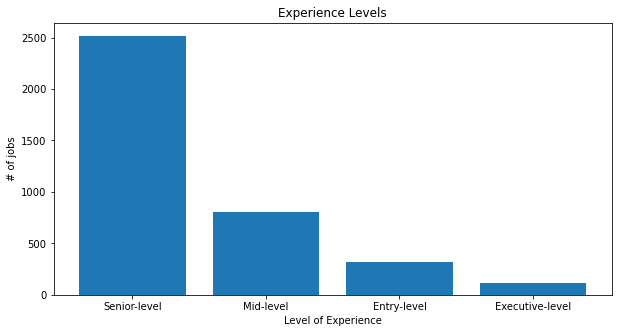

In [11]:
fig = plt.figure(figsize = (10,5))

plt.bar(exp_level.index,exp_level.values)
plt.xlabel('Level of Experience')
plt.ylabel('# of jobs')
plt.title('Experience Levels')
plt.show()

The majority of jobs are considered to be senior-level, while executive level holds the least amount of opportunity.

**Job Title:**

Earlier it was shown that there are 93 unique job titles in this data set.

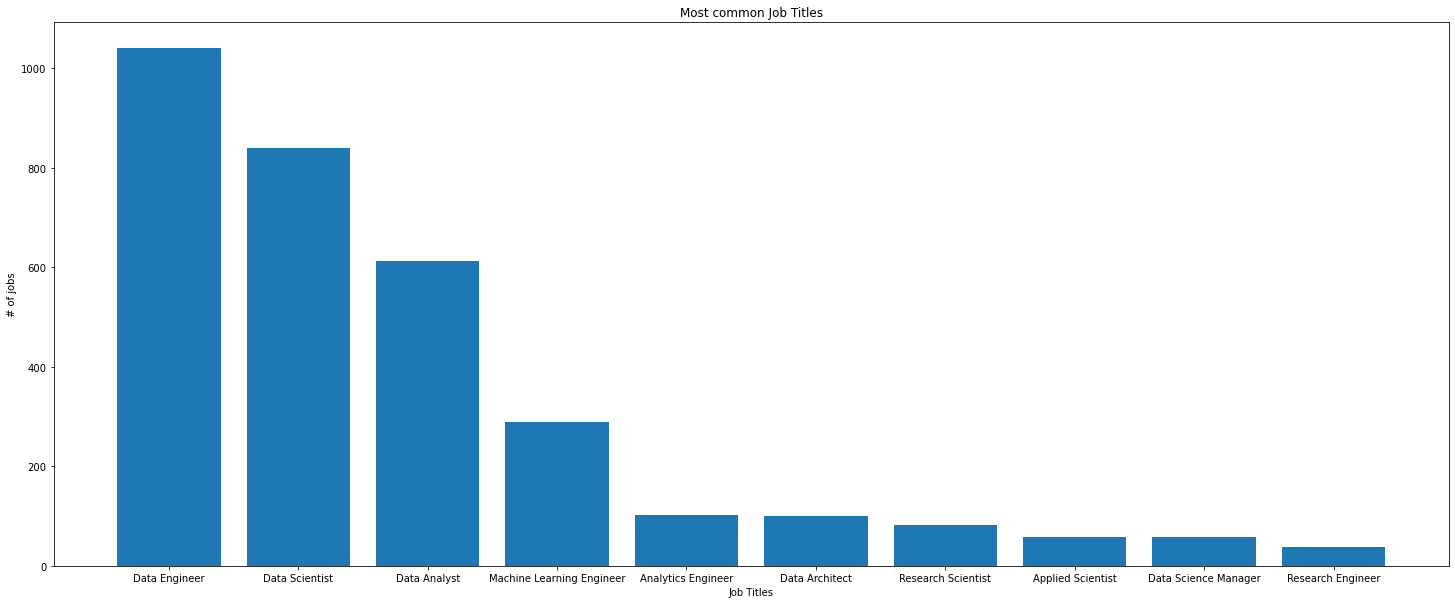

In [12]:
most_common_jobs = df['job_title'].value_counts()[:10]

fig = plt.figure(figsize = (25,10))

plt.bar(most_common_jobs.index,most_common_jobs.values)
plt.xlabel('Job Titles')
plt.ylabel('# of jobs')
plt.title('Most common Job Titles')
plt.show()

Data Engineer is the most common job title, followed by Data Scientist and Data Analyst. These are the roles with the most opportunity in the Data Science industry.

**Employment Type:**

In [13]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('PT','Part_Time')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

employment = df['employment_type'].value_counts()

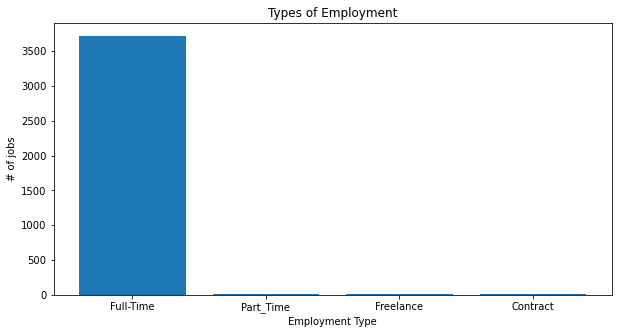

In [14]:
fig = plt.figure(figsize = (10,5))

plt.bar(employment.index,employment.values)
plt.xlabel('Employment Type')
plt.ylabel('# of jobs')
plt.title('Types of Employment')
plt.show()

The overwhelming majority of jobs in this dataset are full time roles.

**Company and Employee locations:**

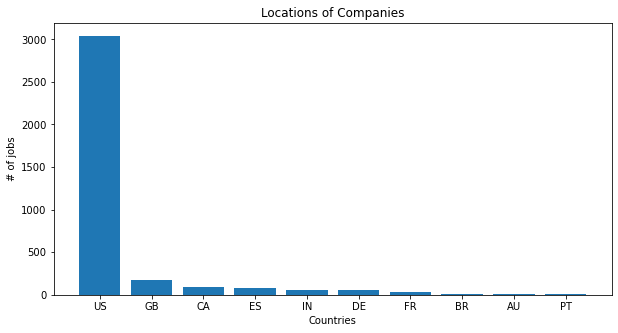

In [15]:
comp_loc = df['company_location'].value_counts()[:10]

fig = plt.figure(figsize = (10,5))

plt.bar(comp_loc.index,comp_loc.values)
plt.xlabel('Countries')
plt.ylabel('# of jobs')
plt.title('Locations of Companies')
plt.show()

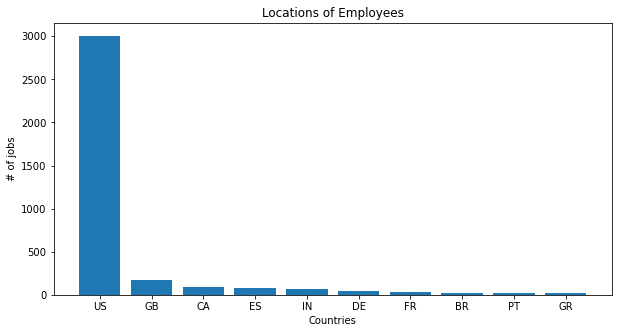

In [16]:
emp_loc = df['employee_residence'].value_counts()[:10]

fig = plt.figure(figsize = (10,5))

plt.bar(emp_loc.index,emp_loc.values)
plt.xlabel('Countries')
plt.ylabel('# of jobs')
plt.title('Locations of Employees')
plt.show()

After examining the locations of both the companies and employees, it is clear that the majority of companies and their employees are based in the US.

**Company size:**

In [17]:
df['company_size'] = df['company_size'].replace('L','Large')
df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('S','Small')

comp_size = df['company_size'].value_counts()

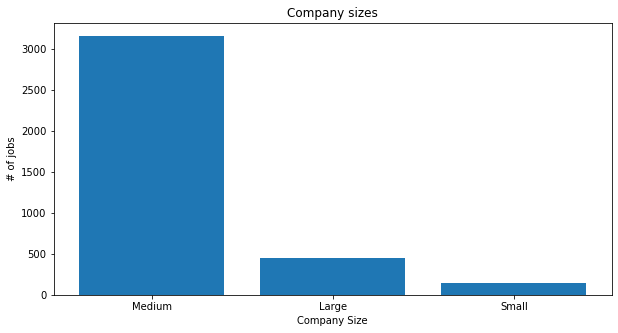

In [18]:
fig = plt.figure(figsize = (10,5))

plt.bar(comp_size.index,comp_size.values)
plt.xlabel('Company Size')
plt.ylabel('# of jobs')
plt.title('Company sizes')
plt.show()

**Categorical Features:**

After analysis of all the categorical features of the dataset, a few things can be concluded:

- Most of the job opportunties in this dataset are related to companies and employees based in the US.
- Most of these companies are mid-sized, and there are relatively few opportunties in data science at small companies and outside the US.
- Almost all of the job opportunities are full-time positions and considered to be senior-level.
- The titles of these positions vary, but the most common is Data Engineer and all of the top 3 have 'Data' in the title.

# Exploratory Data Analysis - Numerical Features

**Salary:**

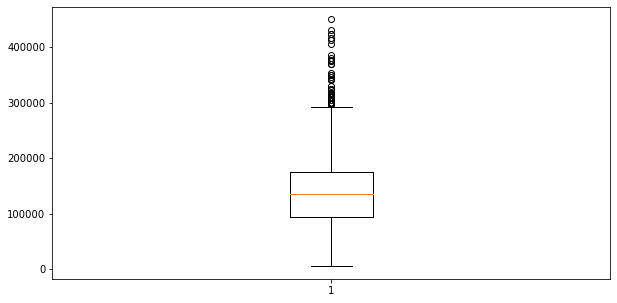

In [19]:
fig = plt.figure(figsize = (10,5))

plt.boxplot(df['salary_in_usd'])

plt.show()

This boxplot shows the distribution of salary in USD. The median salary looks to sit around 135k, while the third quartile looks to be closer to 200k. The max sits close to 300k, with several outliers showing salary at or above 400k.

**Work Year:**

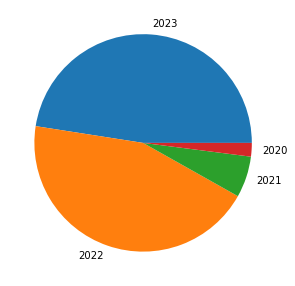

In [20]:
work_yr = df['work_year'].value_counts()

fig = plt.figure(figsize = (10,5))

plt.pie(work_yr.values,labels = work_yr.index)

plt.show()

The vast majority of this data is from 2022 and 2023. Only a small portion is from 2020. This could be due to increased demand for jobs in the data science industry, with supply in opportunity increasing in the last two years.

**Remote Ratio:**

In [21]:
df['remote_ratio'] = df['remote_ratio'].apply(str)

In [22]:
df['remote_ratio'] = df['remote_ratio'].replace('100','Fully-Remote')
df['remote_ratio'] = df['remote_ratio'].replace('50','Partially-Remote')
df['remote_ratio'] = df['remote_ratio'].replace('0','No Remote')

remote = df['remote_ratio'].value_counts()

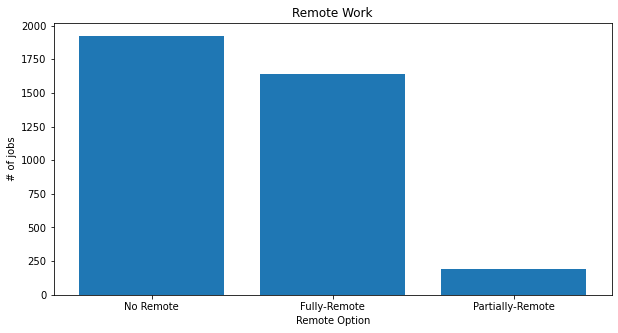

In [23]:
fig = plt.figure(figsize = (10,5))

plt.bar(remote.index,remote.values)
plt.xlabel('Remote Option')
plt.ylabel('# of jobs')
plt.title('Remote Work')
plt.show()

Most of the job opportunites do not offer a remote working option and are considered to be on-site jobs. A fair amount of jobs are still fully remote, while the hybrid work from home environment is the least popular.

**Numerical Features:**

After analysis of the numerical features of this dataset, a few things can be concluded:

- The median salary for jobs in the data science industry is around 135k, and the potential to earn upwards of 400k is there.
- The data collected is almost all from 2022 and 2023. This could be due to a higher demand for data science jobs, as companies are collecting more data than ever.
- Most companies seem to be wanting their employees back in the office in 2023, as the No Remote option is the most common. Still a fair amount of companies offer full time remote positions, but the hybrid model seems to be the least popular.

# Further Analysis of Salary

**Salary and Experience:**

In [24]:
experience_salary = df[['experience_level','salary_in_usd']]

entry_salary = experience_salary.loc[experience_salary['experience_level'] == 'Entry-level']
mid_salary = experience_salary.loc[experience_salary['experience_level'] == 'Mid-level']
senior_salary = experience_salary.loc[experience_salary['experience_level'] == 'Senior-level']
exec_salary = experience_salary.loc[experience_salary['experience_level'] == 'Executive-level']

mean_sal = [entry_salary['salary_in_usd'].mean(),mid_salary['salary_in_usd'].mean(),senior_salary['salary_in_usd'].mean(),
            exec_salary['salary_in_usd'].mean()]

experience_labels = ['Entry-level','Mid-level','Senior-level','Executive-level']

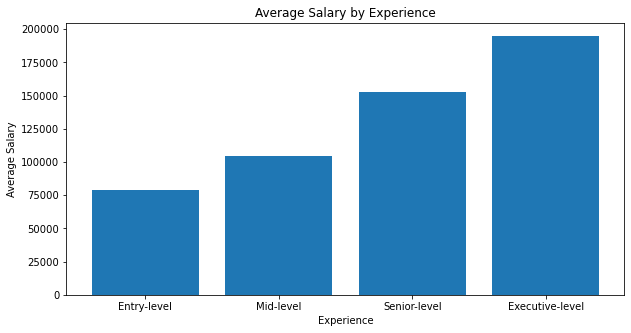

In [25]:
fig = plt.figure(figsize = (10,5))

plt.bar(experience_labels,mean_sal)
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience')
plt.show()

As expected, average salary increases as experience level does. The average entry-level position in the data science industry is about 75k, while executives average close to 200k.

**Salary and Company Size:**

In [26]:
sizes_salary = df[['company_size','salary_in_usd']]

small_salary = sizes_salary.loc[sizes_salary['company_size'] == 'Small']
medium_salary = sizes_salary.loc[sizes_salary['company_size'] == 'Medium']
large_salary = sizes_salary.loc[sizes_salary['company_size'] == 'Large']

mean_size_sal = [small_salary['salary_in_usd'].mean(),medium_salary['salary_in_usd'].mean(),
                 large_salary['salary_in_usd'].mean()]

sizes_labels = ['Small','Medium','Large']

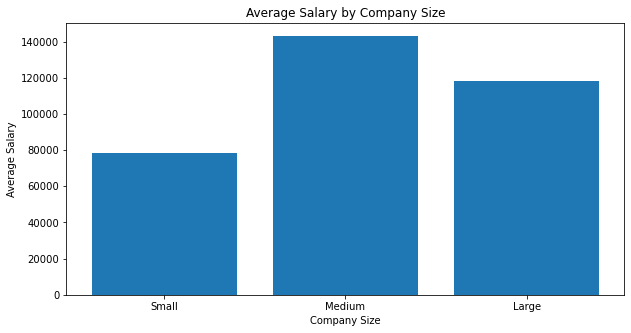

In [27]:
fig = plt.figure(figsize = (10,5))

plt.bar(sizes_labels,mean_size_sal)
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.show()

Interestingly, medium sized companies seem to pay the highest average salary. This could be due to more executive roles in these companies. Small sized companies have the lowest average salary, probabaly meaning they mostly have entry level positions in data science.

**Salary and Work Year:**

In [28]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]

year_salary = pd.DataFrame(columns = ['2020','2021','2022','2023'])

year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

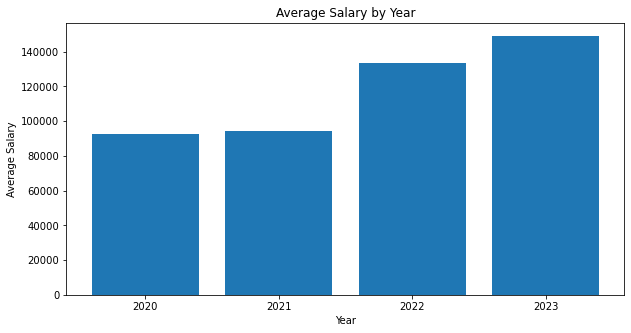

In [29]:
fig = plt.figure(figsize = (10,5))

plt.bar(year_salary.columns,year_salary.values.tolist()[0])
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Year')
plt.show()

It is encouraging to see the average salary in the data science industry increase year over year.

**Salary and Job Title:**

In [30]:
salary_job_title = df.groupby(['job_title'])['salary_in_usd'].mean().reset_index()

top_average_jobs = salary_job_title.sort_values(by = ['salary_in_usd'],ascending=False)[:8]

lowest_average_jobs = salary_job_title.sort_values(by = ['salary_in_usd'],ascending=True)[:8]

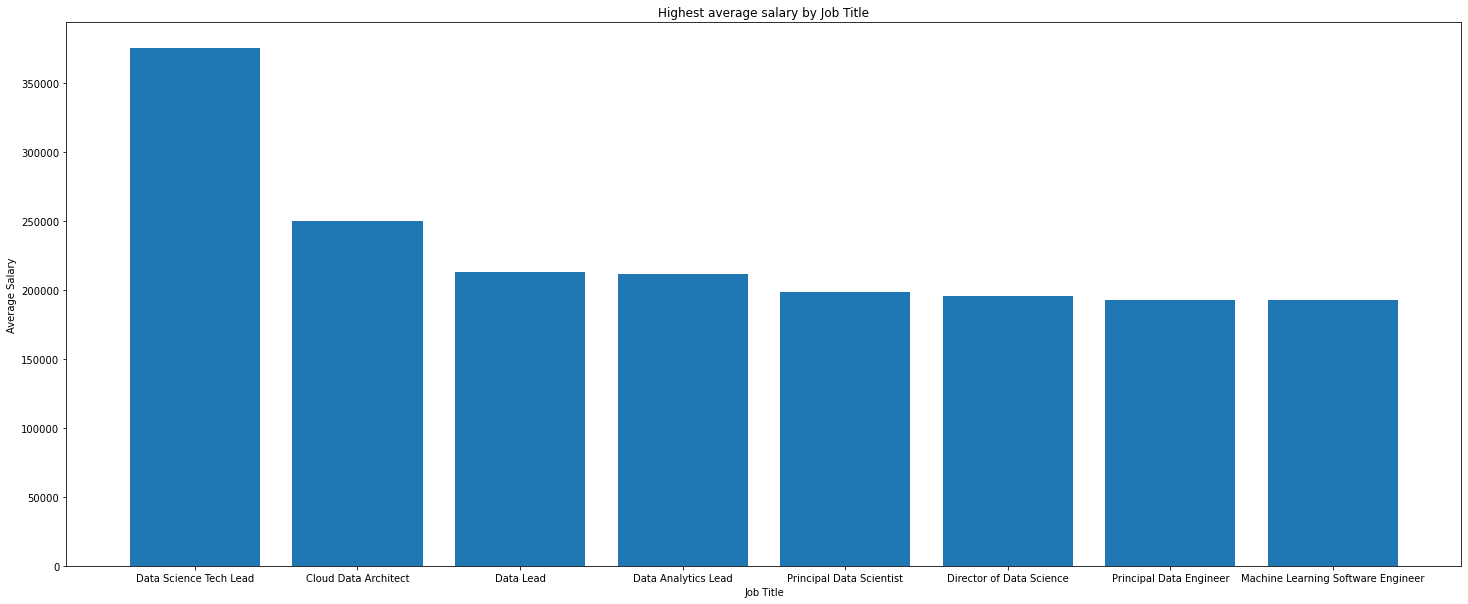

In [31]:
fig = plt.figure(figsize = (25,10))

plt.bar(top_average_jobs['job_title'],top_average_jobs['salary_in_usd'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Highest average salary by Job Title')
plt.show()

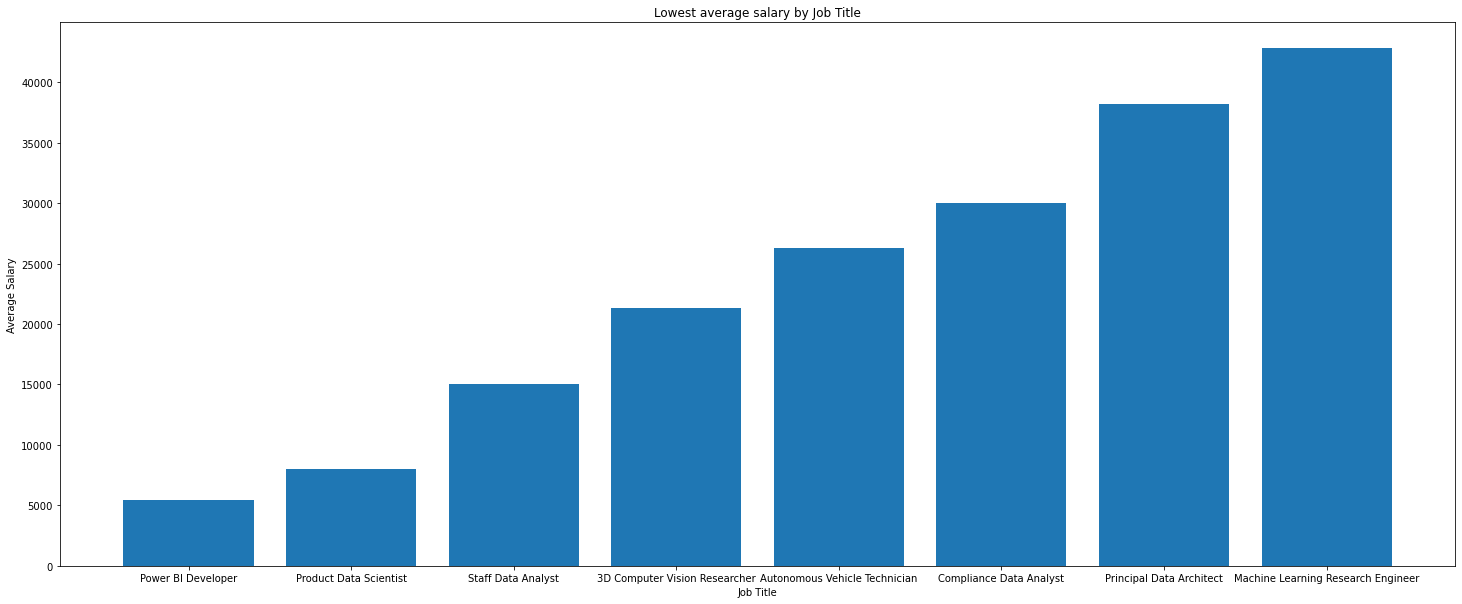

In [32]:
fig = plt.figure(figsize = (25,10))

plt.bar(lowest_average_jobs['job_title'],lowest_average_jobs['salary_in_usd'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Lowest average salary by Job Title')
plt.show()

Data Science Tech Lead has the average highest salary out of any job in the data science industry. 3 of the top 4 highest paying roles have 'Lead' in their title. One can assume that responsibilities would also include manageral duties, and would presumedly be leading a group of data scientists.

It is interesting to see the lowest paying job be a Power BI Developer, as that information may sway individuals to not look to specialize in Power BI.

**Salary Analysis:**

After analysis of salary, a few things can be concluded:

- Salaries in the data science indsutry as a whole have increased steadily over the past few years.
- Average salary increases with level of experience, and the highest paying roles are that of team leads. Most likely with managerial aspects to the job.
- Medium sized companies had the highest average of salary, while smaller sized companies did not offer as much.
- There are some very low paying jobs in the data science industry, it is probably best to not specialize in one area that is not paid well.

# Salary Prediction